## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  60.998436  1523.987014  0.212358   2.029454  1.263054
1  17.582120  1538.139618  0.339004   7.625710  1.632905
2   2.145075  1487.670247  0.574511   3.349170  1.627819
3  52.830666   547.077760  0.080597   2.982069  0.685229
4  36.873094  1142.715979  0.543592  10.534819  1.499307


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.18391 | train_mse: 4.61792 | train_mae: 1.62122 |  0:00:00s
epoch 1  | loss: 1.14453 | train_mse: 4.03039 | train_mae: 1.5285  |  0:00:00s


epoch 2  | loss: 1.24737 | train_mse: 3.60818 | train_mae: 1.44515 |  0:00:01s


epoch 3  | loss: 1.04622 | train_mse: 3.0949  | train_mae: 1.34829 |  0:00:01s
epoch 4  | loss: 1.06825 | train_mse: 2.88749 | train_mae: 1.31579 |  0:00:01s


epoch 5  | loss: 0.9001  | train_mse: 2.63581 | train_mae: 1.25746 |  0:00:01s
epoch 6  | loss: 0.71493 | train_mse: 2.35836 | train_mae: 1.17815 |  0:00:01s


epoch 7  | loss: 0.75582 | train_mse: 2.06555 | train_mae: 1.09873 |  0:00:02s
epoch 8  | loss: 0.77678 | train_mse: 1.86565 | train_mae: 1.04711 |  0:00:02s


epoch 9  | loss: 0.91479 | train_mse: 1.68184 | train_mae: 0.99459 |  0:00:02s
epoch 10 | loss: 0.6712  | train_mse: 1.51923 | train_mae: 0.94649 |  0:00:02s


epoch 11 | loss: 0.70599 | train_mse: 1.38304 | train_mae: 0.90568 |  0:00:02s
epoch 12 | loss: 0.71058 | train_mse: 1.24108 | train_mae: 0.84873 |  0:00:02s


epoch 13 | loss: 0.70951 | train_mse: 1.12093 | train_mae: 0.80373 |  0:00:02s
epoch 14 | loss: 0.72158 | train_mse: 1.07156 | train_mae: 0.78024 |  0:00:03s


epoch 15 | loss: 0.66514 | train_mse: 0.99063 | train_mae: 0.74973 |  0:00:03s
epoch 16 | loss: 0.72599 | train_mse: 0.98513 | train_mae: 0.73371 |  0:00:03s


epoch 17 | loss: 0.91372 | train_mse: 0.94542 | train_mae: 0.71878 |  0:00:03s


epoch 18 | loss: 0.88663 | train_mse: 0.87353 | train_mae: 0.68864 |  0:00:04s


epoch 19 | loss: 0.62764 | train_mse: 0.81668 | train_mae: 0.66029 |  0:00:04s
epoch 20 | loss: 0.5066  | train_mse: 0.76922 | train_mae: 0.63716 |  0:00:05s


epoch 21 | loss: 0.5041  | train_mse: 0.73569 | train_mae: 0.6248  |  0:00:05s
epoch 22 | loss: 0.71354 | train_mse: 0.71349 | train_mae: 0.61382 |  0:00:05s


epoch 23 | loss: 0.66374 | train_mse: 0.69105 | train_mae: 0.60542 |  0:00:05s


epoch 24 | loss: 0.7332  | train_mse: 0.67701 | train_mae: 0.60388 |  0:00:05s
epoch 25 | loss: 0.79168 | train_mse: 0.65452 | train_mae: 0.58912 |  0:00:06s


epoch 26 | loss: 0.55019 | train_mse: 0.63615 | train_mae: 0.58023 |  0:00:06s
epoch 27 | loss: 0.68843 | train_mse: 0.61948 | train_mae: 0.56697 |  0:00:06s


epoch 28 | loss: 0.61278 | train_mse: 0.59584 | train_mae: 0.55202 |  0:00:06s
epoch 29 | loss: 0.4718  | train_mse: 0.57276 | train_mae: 0.54027 |  0:00:06s


epoch 30 | loss: 0.51694 | train_mse: 0.56156 | train_mae: 0.53528 |  0:00:06s


epoch 31 | loss: 0.70662 | train_mse: 0.58202 | train_mae: 0.54023 |  0:00:07s
epoch 32 | loss: 0.39504 | train_mse: 0.57176 | train_mae: 0.5338  |  0:00:07s


epoch 33 | loss: 0.60725 | train_mse: 0.54093 | train_mae: 0.52107 |  0:00:07s
epoch 34 | loss: 0.60236 | train_mse: 0.52972 | train_mae: 0.51822 |  0:00:07s


epoch 35 | loss: 0.78729 | train_mse: 0.52181 | train_mae: 0.51489 |  0:00:07s


epoch 36 | loss: 0.6025  | train_mse: 0.51222 | train_mae: 0.50998 |  0:00:08s


epoch 37 | loss: 0.43006 | train_mse: 0.52545 | train_mae: 0.51535 |  0:00:08s
epoch 38 | loss: 0.72578 | train_mse: 0.52508 | train_mae: 0.51367 |  0:00:08s


epoch 39 | loss: 0.5429  | train_mse: 0.44198 | train_mae: 0.48626 |  0:00:08s
epoch 40 | loss: 0.42733 | train_mse: 0.43891 | train_mae: 0.48633 |  0:00:08s


epoch 41 | loss: 0.49214 | train_mse: 0.42815 | train_mae: 0.47933 |  0:00:08s
epoch 42 | loss: 0.45457 | train_mse: 0.43238 | train_mae: 0.48068 |  0:00:09s
epoch 43 | loss: 0.39305 | train_mse: 0.43761 | train_mae: 0.48183 |  0:00:09s


epoch 44 | loss: 0.55604 | train_mse: 0.43445 | train_mae: 0.47645 |  0:00:09s
epoch 45 | loss: 0.43276 | train_mse: 0.43793 | train_mae: 0.47773 |  0:00:09s


epoch 46 | loss: 0.48986 | train_mse: 0.43732 | train_mae: 0.47705 |  0:00:09s
epoch 47 | loss: 0.46515 | train_mse: 0.4274  | train_mae: 0.46798 |  0:00:09s


epoch 48 | loss: 0.59847 | train_mse: 0.41965 | train_mae: 0.46608 |  0:00:09s
epoch 49 | loss: 0.59562 | train_mse: 0.39826 | train_mae: 0.44973 |  0:00:09s


epoch 50 | loss: 0.40793 | train_mse: 0.39496 | train_mae: 0.45095 |  0:00:10s
epoch 51 | loss: 0.46316 | train_mse: 0.3943  | train_mae: 0.4512  |  0:00:10s
epoch 52 | loss: 0.49748 | train_mse: 0.39384 | train_mae: 0.44911 |  0:00:10s


epoch 53 | loss: 0.39117 | train_mse: 0.38773 | train_mae: 0.44349 |  0:00:10s


epoch 54 | loss: 0.37942 | train_mse: 0.38147 | train_mae: 0.43658 |  0:00:10s
epoch 55 | loss: 0.446   | train_mse: 0.37274 | train_mae: 0.43009 |  0:00:10s


epoch 56 | loss: 0.52346 | train_mse: 0.39424 | train_mae: 0.44169 |  0:00:11s
epoch 57 | loss: 0.36988 | train_mse: 0.41612 | train_mae: 0.44775 |  0:00:11s


epoch 58 | loss: 0.62781 | train_mse: 0.41527 | train_mae: 0.44431 |  0:00:11s
epoch 59 | loss: 0.37919 | train_mse: 0.41661 | train_mae: 0.44183 |  0:00:11s
epoch 60 | loss: 0.51549 | train_mse: 0.40122 | train_mae: 0.43228 |  0:00:11s


epoch 61 | loss: 0.36671 | train_mse: 0.37548 | train_mae: 0.41972 |  0:00:11s
epoch 62 | loss: 0.59674 | train_mse: 0.34529 | train_mae: 0.40504 |  0:00:11s


epoch 63 | loss: 0.38021 | train_mse: 0.32844 | train_mae: 0.39458 |  0:00:11s


epoch 64 | loss: 0.46953 | train_mse: 0.31236 | train_mae: 0.37999 |  0:00:12s


epoch 65 | loss: 0.37833 | train_mse: 0.30891 | train_mae: 0.3798  |  0:00:12s


epoch 66 | loss: 0.35849 | train_mse: 0.30166 | train_mae: 0.37252 |  0:00:12s


epoch 67 | loss: 0.45266 | train_mse: 0.29894 | train_mae: 0.37248 |  0:00:12s


epoch 68 | loss: 0.37239 | train_mse: 0.29692 | train_mae: 0.36977 |  0:00:13s
epoch 69 | loss: 0.37027 | train_mse: 0.29709 | train_mae: 0.36894 |  0:00:13s


epoch 70 | loss: 0.25397 | train_mse: 0.29168 | train_mae: 0.36433 |  0:00:13s


epoch 71 | loss: 0.37462 | train_mse: 0.29008 | train_mae: 0.36153 |  0:00:13s


epoch 72 | loss: 0.36308 | train_mse: 0.28941 | train_mae: 0.36041 |  0:00:14s


epoch 73 | loss: 0.41046 | train_mse: 0.28694 | train_mae: 0.35951 |  0:00:14s
epoch 74 | loss: 0.29915 | train_mse: 0.28432 | train_mae: 0.35947 |  0:00:14s


epoch 75 | loss: 0.39117 | train_mse: 0.28068 | train_mae: 0.35679 |  0:00:14s


epoch 76 | loss: 0.36631 | train_mse: 0.27819 | train_mae: 0.3535  |  0:00:15s
epoch 77 | loss: 0.4195  | train_mse: 0.27593 | train_mae: 0.35202 |  0:00:15s


epoch 78 | loss: 0.65057 | train_mse: 0.27624 | train_mae: 0.3535  |  0:00:15s
epoch 79 | loss: 0.389   | train_mse: 0.2733  | train_mae: 0.35259 |  0:00:15s


epoch 80 | loss: 0.35144 | train_mse: 0.26726 | train_mae: 0.3457  |  0:00:15s
epoch 81 | loss: 0.38876 | train_mse: 0.26609 | train_mae: 0.34562 |  0:00:16s


epoch 82 | loss: 0.48281 | train_mse: 0.26219 | train_mae: 0.34425 |  0:00:16s


epoch 83 | loss: 0.36125 | train_mse: 0.25787 | train_mae: 0.34136 |  0:00:16s


epoch 84 | loss: 0.36039 | train_mse: 0.26063 | train_mae: 0.34643 |  0:00:16s
epoch 85 | loss: 0.35908 | train_mse: 0.2833  | train_mae: 0.36089 |  0:00:16s


epoch 86 | loss: 0.37242 | train_mse: 0.31988 | train_mae: 0.3715  |  0:00:17s


epoch 87 | loss: 0.5948  | train_mse: 0.32759 | train_mae: 0.37336 |  0:00:17s


epoch 88 | loss: 0.37223 | train_mse: 0.30239 | train_mae: 0.36802 |  0:00:18s


epoch 89 | loss: 0.30109 | train_mse: 0.26131 | train_mae: 0.35014 |  0:00:18s


epoch 90 | loss: 0.39616 | train_mse: 0.25687 | train_mae: 0.344   |  0:00:19s


epoch 91 | loss: 0.37846 | train_mse: 0.25509 | train_mae: 0.34051 |  0:00:19s


epoch 92 | loss: 0.49545 | train_mse: 0.25343 | train_mae: 0.33837 |  0:00:19s


epoch 93 | loss: 0.27691 | train_mse: 0.24969 | train_mae: 0.33569 |  0:00:20s


epoch 94 | loss: 0.40381 | train_mse: 0.24183 | train_mae: 0.33192 |  0:00:20s
epoch 95 | loss: 0.41223 | train_mse: 0.27059 | train_mae: 0.34153 |  0:00:20s


epoch 96 | loss: 0.48075 | train_mse: 0.2695  | train_mae: 0.33892 |  0:00:20s
epoch 97 | loss: 0.46994 | train_mse: 0.27996 | train_mae: 0.3455  |  0:00:21s


epoch 98 | loss: 0.43386 | train_mse: 0.30118 | train_mae: 0.34822 |  0:00:21s
epoch 99 | loss: 0.39626 | train_mse: 0.29427 | train_mae: 0.35146 |  0:00:21s


epoch 100| loss: 0.49167 | train_mse: 0.31183 | train_mae: 0.35937 |  0:00:21s
epoch 101| loss: 0.44402 | train_mse: 0.25423 | train_mae: 0.34352 |  0:00:21s


epoch 102| loss: 0.38432 | train_mse: 0.257   | train_mae: 0.33827 |  0:00:21s


epoch 103| loss: 0.36486 | train_mse: 0.23711 | train_mae: 0.32536 |  0:00:21s
epoch 104| loss: 0.30622 | train_mse: 0.23146 | train_mae: 0.32253 |  0:00:21s


epoch 105| loss: 0.41164 | train_mse: 0.23171 | train_mae: 0.3258  |  0:00:22s
epoch 106| loss: 0.36478 | train_mse: 0.23442 | train_mae: 0.3305  |  0:00:22s


epoch 107| loss: 0.41772 | train_mse: 0.23705 | train_mae: 0.33509 |  0:00:22s
epoch 108| loss: 0.51371 | train_mse: 0.23679 | train_mae: 0.33233 |  0:00:22s


epoch 109| loss: 0.37334 | train_mse: 0.23286 | train_mae: 0.32841 |  0:00:22s


epoch 110| loss: 0.24903 | train_mse: 0.22907 | train_mae: 0.3243  |  0:00:23s
epoch 111| loss: 0.34939 | train_mse: 0.22791 | train_mae: 0.32336 |  0:00:23s


epoch 112| loss: 0.30322 | train_mse: 0.22524 | train_mae: 0.31897 |  0:00:23s


epoch 113| loss: 0.29775 | train_mse: 0.22117 | train_mae: 0.31265 |  0:00:23s


epoch 114| loss: 0.30978 | train_mse: 0.22155 | train_mae: 0.31381 |  0:00:24s


epoch 115| loss: 0.27403 | train_mse: 0.22267 | train_mae: 0.31821 |  0:00:24s


epoch 116| loss: 0.4651  | train_mse: 0.22124 | train_mae: 0.31814 |  0:00:25s
epoch 117| loss: 0.3707  | train_mse: 0.23082 | train_mae: 0.32781 |  0:00:25s


epoch 118| loss: 0.28956 | train_mse: 0.2589  | train_mae: 0.34114 |  0:00:25s


epoch 119| loss: 0.43459 | train_mse: 0.23373 | train_mae: 0.33234 |  0:00:25s
epoch 120| loss: 0.32482 | train_mse: 0.23447 | train_mae: 0.33077 |  0:00:25s


epoch 121| loss: 0.33601 | train_mse: 0.23521 | train_mae: 0.33108 |  0:00:26s
epoch 122| loss: 0.29492 | train_mse: 0.23228 | train_mae: 0.33055 |  0:00:26s


epoch 123| loss: 0.30307 | train_mse: 0.23045 | train_mae: 0.33105 |  0:00:26s


epoch 124| loss: 0.32736 | train_mse: 0.22671 | train_mae: 0.32962 |  0:00:26s
epoch 125| loss: 0.32554 | train_mse: 0.22245 | train_mae: 0.32491 |  0:00:26s


epoch 126| loss: 0.51157 | train_mse: 0.24432 | train_mae: 0.34107 |  0:00:27s
epoch 127| loss: 0.43502 | train_mse: 0.24196 | train_mae: 0.34142 |  0:00:27s


epoch 128| loss: 0.42239 | train_mse: 0.23006 | train_mae: 0.33353 |  0:00:28s


epoch 129| loss: 0.36501 | train_mse: 0.21696 | train_mae: 0.32294 |  0:00:28s


epoch 130| loss: 0.32494 | train_mse: 0.21788 | train_mae: 0.32441 |  0:00:28s


epoch 131| loss: 0.34062 | train_mse: 0.2189  | train_mae: 0.32565 |  0:00:29s


epoch 132| loss: 0.44982 | train_mse: 0.22236 | train_mae: 0.32729 |  0:00:29s


epoch 133| loss: 0.38953 | train_mse: 0.22356 | train_mae: 0.32789 |  0:00:30s


epoch 134| loss: 0.59006 | train_mse: 0.22351 | train_mae: 0.32679 |  0:00:30s


epoch 135| loss: 0.36052 | train_mse: 0.22597 | train_mae: 0.32753 |  0:00:31s


epoch 136| loss: 0.37844 | train_mse: 0.22907 | train_mae: 0.32926 |  0:00:31s


epoch 137| loss: 0.48504 | train_mse: 0.23592 | train_mae: 0.33547 |  0:00:32s


epoch 138| loss: 0.22356 | train_mse: 0.25557 | train_mae: 0.34531 |  0:00:32s


epoch 139| loss: 0.36715 | train_mse: 0.25393 | train_mae: 0.34316 |  0:00:32s


epoch 140| loss: 0.32319 | train_mse: 0.23711 | train_mae: 0.33422 |  0:00:33s


epoch 141| loss: 0.23993 | train_mse: 0.22882 | train_mae: 0.32728 |  0:00:33s


epoch 142| loss: 0.33081 | train_mse: 0.2255  | train_mae: 0.32461 |  0:00:33s


epoch 143| loss: 0.30553 | train_mse: 0.22414 | train_mae: 0.32307 |  0:00:34s


epoch 144| loss: 0.25055 | train_mse: 0.22345 | train_mae: 0.3225  |  0:00:34s


epoch 145| loss: 0.32763 | train_mse: 0.22192 | train_mae: 0.32118 |  0:00:34s


epoch 146| loss: 0.2999  | train_mse: 0.21934 | train_mae: 0.31989 |  0:00:35s


epoch 147| loss: 0.43764 | train_mse: 0.21731 | train_mae: 0.3183  |  0:00:35s


epoch 148| loss: 0.44892 | train_mse: 0.21797 | train_mae: 0.31923 |  0:00:36s


epoch 149| loss: 0.36956 | train_mse: 0.22076 | train_mae: 0.3223  |  0:00:36s


epoch 150| loss: 0.34041 | train_mse: 0.22067 | train_mae: 0.32301 |  0:00:36s
epoch 151| loss: 0.26798 | train_mse: 0.21979 | train_mae: 0.32165 |  0:00:36s


epoch 152| loss: 0.37882 | train_mse: 0.21929 | train_mae: 0.3193  |  0:00:37s


epoch 153| loss: 0.25863 | train_mse: 0.22163 | train_mae: 0.31928 |  0:00:37s


epoch 154| loss: 0.27556 | train_mse: 0.21998 | train_mae: 0.31464 |  0:00:37s


epoch 155| loss: 0.28806 | train_mse: 0.22115 | train_mae: 0.31855 |  0:00:37s


epoch 156| loss: 0.2269  | train_mse: 0.21518 | train_mae: 0.31407 |  0:00:38s


epoch 157| loss: 0.26679 | train_mse: 0.20826 | train_mae: 0.30988 |  0:00:38s


epoch 158| loss: 0.30732 | train_mse: 0.20924 | train_mae: 0.30971 |  0:00:38s


epoch 159| loss: 0.36646 | train_mse: 0.20972 | train_mae: 0.30931 |  0:00:39s


epoch 160| loss: 0.3112  | train_mse: 0.21014 | train_mae: 0.31042 |  0:00:39s


epoch 161| loss: 0.32148 | train_mse: 0.21282 | train_mae: 0.3108  |  0:00:39s


epoch 162| loss: 0.42123 | train_mse: 0.22155 | train_mae: 0.31398 |  0:00:40s
epoch 163| loss: 0.35809 | train_mse: 0.23881 | train_mae: 0.32943 |  0:00:40s


epoch 164| loss: 0.22227 | train_mse: 0.23379 | train_mae: 0.32437 |  0:00:40s


epoch 165| loss: 0.37004 | train_mse: 0.24381 | train_mae: 0.33424 |  0:00:41s


epoch 166| loss: 0.37277 | train_mse: 0.24174 | train_mae: 0.33541 |  0:00:41s


epoch 167| loss: 0.38323 | train_mse: 0.24032 | train_mae: 0.33553 |  0:00:41s


epoch 168| loss: 0.28407 | train_mse: 0.2301  | train_mae: 0.3291  |  0:00:41s


epoch 169| loss: 0.31415 | train_mse: 0.21544 | train_mae: 0.31854 |  0:00:42s


epoch 170| loss: 0.25922 | train_mse: 0.2084  | train_mae: 0.31428 |  0:00:42s


epoch 171| loss: 0.36621 | train_mse: 0.20282 | train_mae: 0.30764 |  0:00:42s
epoch 172| loss: 0.33409 | train_mse: 0.20129 | train_mae: 0.30428 |  0:00:42s


epoch 173| loss: 0.24123 | train_mse: 0.19911 | train_mae: 0.30005 |  0:00:43s


epoch 174| loss: 0.36533 | train_mse: 0.19735 | train_mae: 0.29673 |  0:00:43s


epoch 175| loss: 0.3726  | train_mse: 0.19574 | train_mae: 0.29512 |  0:00:43s


epoch 176| loss: 0.27951 | train_mse: 0.1954  | train_mae: 0.29711 |  0:00:44s
epoch 177| loss: 0.31559 | train_mse: 0.19584 | train_mae: 0.3001  |  0:00:44s


epoch 178| loss: 0.43779 | train_mse: 0.19484 | train_mae: 0.30042 |  0:00:44s
epoch 179| loss: 0.40355 | train_mse: 0.19363 | train_mae: 0.29988 |  0:00:44s


epoch 180| loss: 0.43382 | train_mse: 0.19532 | train_mae: 0.29853 |  0:00:44s


epoch 181| loss: 0.36158 | train_mse: 0.20026 | train_mae: 0.30062 |  0:00:45s
epoch 182| loss: 0.4045  | train_mse: 0.20478 | train_mae: 0.30477 |  0:00:45s


epoch 183| loss: 0.51016 | train_mse: 0.20867 | train_mae: 0.30565 |  0:00:45s
epoch 184| loss: 0.50955 | train_mse: 0.20604 | train_mae: 0.30425 |  0:00:45s


epoch 185| loss: 0.66135 | train_mse: 0.20521 | train_mae: 0.3001  |  0:00:45s
epoch 186| loss: 0.33869 | train_mse: 0.2014  | train_mae: 0.29711 |  0:00:45s


epoch 187| loss: 0.31157 | train_mse: 0.19846 | train_mae: 0.2943  |  0:00:45s
epoch 188| loss: 0.20397 | train_mse: 0.19557 | train_mae: 0.29259 |  0:00:46s


epoch 189| loss: 0.50851 | train_mse: 0.19414 | train_mae: 0.29166 |  0:00:46s
epoch 190| loss: 0.40311 | train_mse: 0.19289 | train_mae: 0.29129 |  0:00:46s
epoch 191| loss: 0.21945 | train_mse: 0.19341 | train_mae: 0.28992 |  0:00:46s


epoch 192| loss: 0.25736 | train_mse: 0.18959 | train_mae: 0.28716 |  0:00:46s


epoch 193| loss: 0.23979 | train_mse: 0.1892  | train_mae: 0.28487 |  0:00:46s


epoch 194| loss: 0.38354 | train_mse: 0.18509 | train_mae: 0.2848  |  0:00:46s
epoch 195| loss: 0.28871 | train_mse: 0.19475 | train_mae: 0.29704 |  0:00:47s


epoch 196| loss: 0.25409 | train_mse: 0.19773 | train_mae: 0.30149 |  0:00:47s
epoch 197| loss: 0.32761 | train_mse: 0.19853 | train_mae: 0.30079 |  0:00:47s


epoch 198| loss: 0.37432 | train_mse: 0.19853 | train_mae: 0.29982 |  0:00:47s
epoch 199| loss: 0.25968 | train_mse: 0.19304 | train_mae: 0.29412 |  0:00:47s


epoch 200| loss: 0.27587 | train_mse: 0.18895 | train_mae: 0.29072 |  0:00:48s
epoch 201| loss: 0.44964 | train_mse: 0.1879  | train_mae: 0.28882 |  0:00:48s


epoch 202| loss: 0.22596 | train_mse: 0.18735 | train_mae: 0.28698 |  0:00:48s
epoch 203| loss: 0.28987 | train_mse: 0.1842  | train_mae: 0.28524 |  0:00:48s


epoch 204| loss: 0.34091 | train_mse: 0.18039 | train_mae: 0.28529 |  0:00:48s
epoch 205| loss: 0.22684 | train_mse: 0.18162 | train_mae: 0.28754 |  0:00:48s


epoch 206| loss: 0.20455 | train_mse: 0.18091 | train_mae: 0.28817 |  0:00:49s
epoch 207| loss: 0.18754 | train_mse: 0.18231 | train_mae: 0.29077 |  0:00:49s


epoch 208| loss: 0.35571 | train_mse: 0.1791  | train_mae: 0.28912 |  0:00:49s
epoch 209| loss: 0.24432 | train_mse: 0.17512 | train_mae: 0.28499 |  0:00:49s


epoch 210| loss: 0.32145 | train_mse: 0.17034 | train_mae: 0.28291 |  0:00:49s
epoch 211| loss: 0.36709 | train_mse: 0.16936 | train_mae: 0.2831  |  0:00:49s


epoch 212| loss: 0.19398 | train_mse: 0.17049 | train_mae: 0.28419 |  0:00:49s
epoch 213| loss: 0.33463 | train_mse: 0.17033 | train_mae: 0.2837  |  0:00:50s
epoch 214| loss: 0.28512 | train_mse: 0.17161 | train_mae: 0.28696 |  0:00:50s


epoch 215| loss: 0.51759 | train_mse: 0.1729  | train_mae: 0.2883  |  0:00:50s
epoch 216| loss: 0.2409  | train_mse: 0.17956 | train_mae: 0.29235 |  0:00:50s


epoch 217| loss: 0.20981 | train_mse: 0.17884 | train_mae: 0.29125 |  0:00:50s
epoch 218| loss: 0.28861 | train_mse: 0.1781  | train_mae: 0.28926 |  0:00:50s


epoch 219| loss: 0.26854 | train_mse: 0.17883 | train_mae: 0.28834 |  0:00:50s
epoch 220| loss: 0.19086 | train_mse: 0.17621 | train_mae: 0.28647 |  0:00:51s


epoch 221| loss: 0.26106 | train_mse: 0.17391 | train_mae: 0.28391 |  0:00:51s
epoch 222| loss: 0.27915 | train_mse: 0.16919 | train_mae: 0.27939 |  0:00:51s
epoch 223| loss: 0.22064 | train_mse: 0.18543 | train_mae: 0.28981 |  0:00:51s


epoch 224| loss: 0.38044 | train_mse: 0.16686 | train_mae: 0.2808  |  0:00:51s
epoch 225| loss: 0.31152 | train_mse: 0.1643  | train_mae: 0.28038 |  0:00:51s


epoch 226| loss: 0.29036 | train_mse: 0.16149 | train_mae: 0.27838 |  0:00:51s
epoch 227| loss: 0.26402 | train_mse: 0.16318 | train_mae: 0.28024 |  0:00:51s


epoch 228| loss: 0.28394 | train_mse: 0.16454 | train_mae: 0.28178 |  0:00:51s
epoch 229| loss: 0.23824 | train_mse: 0.16556 | train_mae: 0.2806  |  0:00:52s


epoch 230| loss: 0.28639 | train_mse: 0.17098 | train_mae: 0.2838  |  0:00:52s
epoch 231| loss: 0.18767 | train_mse: 0.17658 | train_mae: 0.28676 |  0:00:52s


epoch 232| loss: 0.40469 | train_mse: 0.17842 | train_mae: 0.28764 |  0:00:52s
epoch 233| loss: 0.2625  | train_mse: 0.18219 | train_mae: 0.29026 |  0:00:52s


epoch 234| loss: 0.37107 | train_mse: 0.18202 | train_mae: 0.28848 |  0:00:52s
epoch 235| loss: 0.22133 | train_mse: 0.18292 | train_mae: 0.28784 |  0:00:53s


epoch 236| loss: 0.37755 | train_mse: 0.18458 | train_mae: 0.28782 |  0:00:53s
epoch 237| loss: 0.25026 | train_mse: 0.18933 | train_mae: 0.28819 |  0:00:53s


epoch 238| loss: 0.31893 | train_mse: 0.19553 | train_mae: 0.29085 |  0:00:53s
epoch 239| loss: 0.21621 | train_mse: 0.19818 | train_mae: 0.29094 |  0:00:53s


epoch 240| loss: 0.3734  | train_mse: 0.20234 | train_mae: 0.29105 |  0:00:53s
epoch 241| loss: 0.25775 | train_mse: 0.20221 | train_mae: 0.29194 |  0:00:53s


epoch 242| loss: 0.20962 | train_mse: 0.20199 | train_mae: 0.29455 |  0:00:53s
epoch 243| loss: 0.32497 | train_mse: 0.20143 | train_mae: 0.29684 |  0:00:54s


epoch 244| loss: 0.26757 | train_mse: 0.19883 | train_mae: 0.2961  |  0:00:54s
epoch 245| loss: 0.25935 | train_mse: 0.19382 | train_mae: 0.29354 |  0:00:54s


epoch 246| loss: 0.2512  | train_mse: 0.1929  | train_mae: 0.29438 |  0:00:54s
epoch 247| loss: 0.22851 | train_mse: 0.19184 | train_mae: 0.29489 |  0:00:54s


epoch 248| loss: 0.38289 | train_mse: 0.18944 | train_mae: 0.29288 |  0:00:55s
epoch 249| loss: 0.31463 | train_mse: 0.19061 | train_mae: 0.29398 |  0:00:55s
epoch 250| loss: 0.26462 | train_mse: 0.1841  | train_mae: 0.29131 |  0:00:55s


epoch 251| loss: 0.22559 | train_mse: 0.18312 | train_mae: 0.28975 |  0:00:55s
epoch 252| loss: 0.23167 | train_mse: 0.18252 | train_mae: 0.28683 |  0:00:55s


epoch 253| loss: 0.21546 | train_mse: 0.18133 | train_mae: 0.28476 |  0:00:55s
epoch 254| loss: 0.22936 | train_mse: 0.1761  | train_mae: 0.28161 |  0:00:55s


epoch 255| loss: 0.2557  | train_mse: 0.17602 | train_mae: 0.28263 |  0:00:55s
epoch 256| loss: 0.41078 | train_mse: 0.17343 | train_mae: 0.28445 |  0:00:55s
epoch 257| loss: 0.30905 | train_mse: 0.17156 | train_mae: 0.28484 |  0:00:55s


epoch 258| loss: 0.22626 | train_mse: 0.16889 | train_mae: 0.28321 |  0:00:56s
epoch 259| loss: 0.28792 | train_mse: 0.16577 | train_mae: 0.27954 |  0:00:56s
epoch 260| loss: 0.25904 | train_mse: 0.15781 | train_mae: 0.27489 |  0:00:56s


epoch 261| loss: 0.22439 | train_mse: 0.15882 | train_mae: 0.27676 |  0:00:56s
epoch 262| loss: 0.20882 | train_mse: 0.15649 | train_mae: 0.27683 |  0:00:56s


epoch 263| loss: 0.23838 | train_mse: 0.15641 | train_mae: 0.27648 |  0:00:56s
epoch 264| loss: 0.15701 | train_mse: 0.15871 | train_mae: 0.27877 |  0:00:56s


epoch 265| loss: 0.21836 | train_mse: 0.158   | train_mae: 0.27796 |  0:00:56s
epoch 266| loss: 0.2114  | train_mse: 0.15988 | train_mae: 0.28005 |  0:00:56s
epoch 267| loss: 0.27568 | train_mse: 0.16356 | train_mae: 0.28103 |  0:00:56s


epoch 268| loss: 0.38293 | train_mse: 0.15916 | train_mae: 0.27772 |  0:00:57s
epoch 269| loss: 0.2513  | train_mse: 0.1562  | train_mae: 0.27603 |  0:00:57s


epoch 270| loss: 0.41733 | train_mse: 0.15183 | train_mae: 0.27134 |  0:00:57s
epoch 271| loss: 0.44107 | train_mse: 0.14821 | train_mae: 0.26884 |  0:00:57s
epoch 272| loss: 0.1695  | train_mse: 0.14803 | train_mae: 0.26803 |  0:00:57s


epoch 273| loss: 0.37557 | train_mse: 0.14682 | train_mae: 0.26474 |  0:00:57s
epoch 274| loss: 0.33891 | train_mse: 0.14678 | train_mae: 0.2663  |  0:00:57s


epoch 275| loss: 0.25932 | train_mse: 0.14815 | train_mae: 0.26778 |  0:00:57s
epoch 276| loss: 0.2664  | train_mse: 0.15008 | train_mae: 0.26757 |  0:00:57s
epoch 277| loss: 0.24309 | train_mse: 0.15223 | train_mae: 0.26887 |  0:00:58s


epoch 278| loss: 0.20784 | train_mse: 0.16024 | train_mae: 0.27566 |  0:00:58s
epoch 279| loss: 0.36361 | train_mse: 0.16728 | train_mae: 0.27886 |  0:00:58s


epoch 280| loss: 0.19684 | train_mse: 0.16539 | train_mae: 0.27981 |  0:00:58s
epoch 281| loss: 0.40119 | train_mse: 0.16947 | train_mae: 0.28211 |  0:00:58s


epoch 282| loss: 0.26521 | train_mse: 0.17361 | train_mae: 0.28409 |  0:00:58s
epoch 283| loss: 0.29746 | train_mse: 0.16616 | train_mae: 0.27885 |  0:00:58s


epoch 284| loss: 0.33943 | train_mse: 0.16733 | train_mae: 0.27912 |  0:00:58s
epoch 285| loss: 0.25017 | train_mse: 0.16633 | train_mae: 0.27807 |  0:00:58s


epoch 286| loss: 0.2764  | train_mse: 0.16181 | train_mae: 0.2739  |  0:00:59s
epoch 287| loss: 0.36307 | train_mse: 0.16034 | train_mae: 0.27146 |  0:00:59s
epoch 288| loss: 0.28593 | train_mse: 0.15975 | train_mae: 0.27081 |  0:00:59s


epoch 289| loss: 0.49692 | train_mse: 0.15593 | train_mae: 0.27074 |  0:00:59s
epoch 290| loss: 0.22214 | train_mse: 0.15131 | train_mae: 0.26886 |  0:00:59s


epoch 291| loss: 0.39748 | train_mse: 0.14617 | train_mae: 0.26374 |  0:00:59s
epoch 292| loss: 0.39442 | train_mse: 0.14683 | train_mae: 0.2637  |  0:00:59s


epoch 293| loss: 0.24306 | train_mse: 0.14606 | train_mae: 0.26267 |  0:00:59s
epoch 294| loss: 0.22402 | train_mse: 0.14795 | train_mae: 0.2641  |  0:00:59s
epoch 295| loss: 0.16465 | train_mse: 0.14749 | train_mae: 0.26417 |  0:00:59s


epoch 296| loss: 0.24528 | train_mse: 0.14676 | train_mae: 0.26236 |  0:01:00s
epoch 297| loss: 0.28445 | train_mse: 0.14663 | train_mae: 0.26142 |  0:01:00s


epoch 298| loss: 0.31684 | train_mse: 0.14966 | train_mae: 0.26452 |  0:01:00s
epoch 299| loss: 0.26277 | train_mse: 0.15643 | train_mae: 0.27085 |  0:01:00s


epoch 300| loss: 0.22148 | train_mse: 0.16001 | train_mae: 0.27303 |  0:01:00s
epoch 301| loss: 0.19233 | train_mse: 0.15886 | train_mae: 0.27095 |  0:01:00s


epoch 302| loss: 0.3895  | train_mse: 0.15562 | train_mae: 0.2693  |  0:01:01s
epoch 303| loss: 0.19506 | train_mse: 0.14926 | train_mae: 0.26544 |  0:01:01s
epoch 304| loss: 0.18867 | train_mse: 0.1497  | train_mae: 0.26364 |  0:01:01s


epoch 305| loss: 0.25108 | train_mse: 0.1477  | train_mae: 0.26219 |  0:01:01s
epoch 306| loss: 0.39668 | train_mse: 0.13733 | train_mae: 0.25618 |  0:01:01s


epoch 307| loss: 0.21771 | train_mse: 0.12925 | train_mae: 0.25002 |  0:01:01s
epoch 308| loss: 0.30225 | train_mse: 0.12207 | train_mae: 0.24396 |  0:01:01s
epoch 309| loss: 0.20126 | train_mse: 0.11949 | train_mae: 0.24586 |  0:01:01s


epoch 310| loss: 0.24495 | train_mse: 0.11707 | train_mae: 0.24904 |  0:01:01s
epoch 311| loss: 0.19839 | train_mse: 0.1187  | train_mae: 0.2511  |  0:01:01s
epoch 312| loss: 0.12384 | train_mse: 0.11956 | train_mae: 0.25144 |  0:01:02s


epoch 313| loss: 0.2576  | train_mse: 0.12058 | train_mae: 0.25338 |  0:01:02s
epoch 314| loss: 0.21365 | train_mse: 0.11875 | train_mae: 0.25095 |  0:01:02s
epoch 315| loss: 0.26913 | train_mse: 0.11815 | train_mae: 0.24906 |  0:01:02s


epoch 316| loss: 0.22343 | train_mse: 0.11678 | train_mae: 0.24749 |  0:01:02s


epoch 317| loss: 0.23731 | train_mse: 0.11385 | train_mae: 0.24491 |  0:01:02s


epoch 318| loss: 0.16857 | train_mse: 0.11216 | train_mae: 0.24078 |  0:01:02s


epoch 319| loss: 0.28591 | train_mse: 0.11392 | train_mae: 0.24142 |  0:01:03s
epoch 320| loss: 0.392   | train_mse: 0.11717 | train_mae: 0.24338 |  0:01:03s


epoch 321| loss: 0.20528 | train_mse: 0.11996 | train_mae: 0.24545 |  0:01:03s
epoch 322| loss: 0.19673 | train_mse: 0.12136 | train_mae: 0.24628 |  0:01:03s


epoch 323| loss: 0.19488 | train_mse: 0.12321 | train_mae: 0.24568 |  0:01:03s


epoch 324| loss: 0.21635 | train_mse: 0.12568 | train_mae: 0.24438 |  0:01:03s


epoch 325| loss: 0.23203 | train_mse: 0.1224  | train_mae: 0.24053 |  0:01:04s


epoch 326| loss: 0.21426 | train_mse: 0.11627 | train_mae: 0.2368  |  0:01:04s


epoch 327| loss: 0.32458 | train_mse: 0.11179 | train_mae: 0.23441 |  0:01:04s


epoch 328| loss: 0.2295  | train_mse: 0.10908 | train_mae: 0.23201 |  0:01:05s
epoch 329| loss: 0.23057 | train_mse: 0.10771 | train_mae: 0.23027 |  0:01:05s


epoch 330| loss: 0.16499 | train_mse: 0.10744 | train_mae: 0.22984 |  0:01:05s


epoch 331| loss: 0.26005 | train_mse: 0.10723 | train_mae: 0.23133 |  0:01:05s
epoch 332| loss: 0.21614 | train_mse: 0.1072  | train_mae: 0.23135 |  0:01:05s


epoch 333| loss: 0.23951 | train_mse: 0.10865 | train_mae: 0.23512 |  0:01:06s


epoch 334| loss: 0.30202 | train_mse: 0.11168 | train_mae: 0.2403  |  0:01:06s


epoch 335| loss: 0.22987 | train_mse: 0.11116 | train_mae: 0.24016 |  0:01:06s
epoch 336| loss: 0.27784 | train_mse: 0.10929 | train_mae: 0.23754 |  0:01:06s


epoch 337| loss: 0.14309 | train_mse: 0.11055 | train_mae: 0.2372  |  0:01:06s
epoch 338| loss: 0.23581 | train_mse: 0.11013 | train_mae: 0.23653 |  0:01:07s


epoch 339| loss: 0.26176 | train_mse: 0.10988 | train_mae: 0.2386  |  0:01:07s
epoch 340| loss: 0.2736  | train_mse: 0.10935 | train_mae: 0.23918 |  0:01:07s


epoch 341| loss: 0.17692 | train_mse: 0.10935 | train_mae: 0.24038 |  0:01:07s
epoch 342| loss: 0.16413 | train_mse: 0.10912 | train_mae: 0.23923 |  0:01:07s


epoch 343| loss: 0.28258 | train_mse: 0.10764 | train_mae: 0.23793 |  0:01:08s


epoch 344| loss: 0.28618 | train_mse: 0.10877 | train_mae: 0.23666 |  0:01:08s


epoch 345| loss: 0.11606 | train_mse: 0.10429 | train_mae: 0.23324 |  0:01:08s


epoch 346| loss: 0.18739 | train_mse: 0.09598 | train_mae: 0.22675 |  0:01:08s
epoch 347| loss: 0.27774 | train_mse: 0.08555 | train_mae: 0.21696 |  0:01:08s


epoch 348| loss: 0.27913 | train_mse: 0.08148 | train_mae: 0.21287 |  0:01:09s
epoch 349| loss: 0.11916 | train_mse: 0.07823 | train_mae: 0.21022 |  0:01:09s


epoch 350| loss: 0.14998 | train_mse: 0.07387 | train_mae: 0.20533 |  0:01:09s


epoch 351| loss: 0.25668 | train_mse: 0.07177 | train_mae: 0.20434 |  0:01:09s
epoch 352| loss: 0.16343 | train_mse: 0.07385 | train_mae: 0.20759 |  0:01:09s


epoch 353| loss: 0.17243 | train_mse: 0.07569 | train_mae: 0.21041 |  0:01:09s
epoch 354| loss: 0.16628 | train_mse: 0.0766  | train_mae: 0.21294 |  0:01:10s


epoch 355| loss: 0.3698  | train_mse: 0.07591 | train_mae: 0.21192 |  0:01:10s
epoch 356| loss: 0.15603 | train_mse: 0.07538 | train_mae: 0.21077 |  0:01:10s


epoch 357| loss: 0.10434 | train_mse: 0.07442 | train_mae: 0.20907 |  0:01:10s
epoch 358| loss: 0.38181 | train_mse: 0.07446 | train_mae: 0.20917 |  0:01:10s


epoch 359| loss: 0.19945 | train_mse: 0.07528 | train_mae: 0.21127 |  0:01:10s
epoch 360| loss: 0.22565 | train_mse: 0.07196 | train_mae: 0.20755 |  0:01:10s


epoch 361| loss: 0.35633 | train_mse: 0.07142 | train_mae: 0.20621 |  0:01:11s
epoch 362| loss: 0.14625 | train_mse: 0.06921 | train_mae: 0.2023  |  0:01:11s


epoch 363| loss: 0.18141 | train_mse: 0.06977 | train_mae: 0.2039  |  0:01:11s
epoch 364| loss: 0.36125 | train_mse: 0.0713  | train_mae: 0.20524 |  0:01:11s


epoch 365| loss: 0.2622  | train_mse: 0.07396 | train_mae: 0.20726 |  0:01:11s
epoch 366| loss: 0.3154  | train_mse: 0.07224 | train_mae: 0.20488 |  0:01:11s
epoch 367| loss: 0.14137 | train_mse: 0.07191 | train_mae: 0.20434 |  0:01:11s


epoch 368| loss: 0.24046 | train_mse: 0.07005 | train_mae: 0.20394 |  0:01:11s
epoch 369| loss: 0.27006 | train_mse: 0.07009 | train_mae: 0.20405 |  0:01:12s


epoch 370| loss: 0.20824 | train_mse: 0.07032 | train_mae: 0.20304 |  0:01:12s


epoch 371| loss: 0.1274  | train_mse: 0.07243 | train_mae: 0.20522 |  0:01:12s


epoch 372| loss: 0.16882 | train_mse: 0.07814 | train_mae: 0.21157 |  0:01:13s


epoch 373| loss: 0.17652 | train_mse: 0.07815 | train_mae: 0.20981 |  0:01:13s


epoch 374| loss: 0.11825 | train_mse: 0.07917 | train_mae: 0.21051 |  0:01:13s


epoch 375| loss: 0.12079 | train_mse: 0.07772 | train_mae: 0.20802 |  0:01:14s
epoch 376| loss: 0.32299 | train_mse: 0.0735  | train_mae: 0.20413 |  0:01:14s


epoch 377| loss: 0.17373 | train_mse: 0.07135 | train_mae: 0.20158 |  0:01:14s
epoch 378| loss: 0.2563  | train_mse: 0.06978 | train_mae: 0.19813 |  0:01:14s


epoch 379| loss: 0.13935 | train_mse: 0.0677  | train_mae: 0.19443 |  0:01:14s


epoch 380| loss: 0.17925 | train_mse: 0.06873 | train_mae: 0.19453 |  0:01:15s
epoch 381| loss: 0.18157 | train_mse: 0.07446 | train_mae: 0.1991  |  0:01:15s


epoch 382| loss: 0.09563 | train_mse: 0.07944 | train_mae: 0.20496 |  0:01:15s
epoch 383| loss: 0.22779 | train_mse: 0.08362 | train_mae: 0.21044 |  0:01:15s


epoch 384| loss: 0.20045 | train_mse: 0.08695 | train_mae: 0.21038 |  0:01:15s


epoch 385| loss: 0.27433 | train_mse: 0.08917 | train_mae: 0.20977 |  0:01:15s
epoch 386| loss: 0.11026 | train_mse: 0.08868 | train_mae: 0.20962 |  0:01:16s


epoch 387| loss: 0.10147 | train_mse: 0.08752 | train_mae: 0.21046 |  0:01:16s
epoch 388| loss: 0.17867 | train_mse: 0.08718 | train_mae: 0.2115  |  0:01:16s


epoch 389| loss: 0.15979 | train_mse: 0.08479 | train_mae: 0.20921 |  0:01:16s


epoch 390| loss: 0.21272 | train_mse: 0.07798 | train_mae: 0.20148 |  0:01:16s
epoch 391| loss: 0.25684 | train_mse: 0.07312 | train_mae: 0.19607 |  0:01:17s


epoch 392| loss: 0.19714 | train_mse: 0.07051 | train_mae: 0.1931  |  0:01:17s


epoch 393| loss: 0.12051 | train_mse: 0.06826 | train_mae: 0.18643 |  0:01:17s


epoch 394| loss: 0.27298 | train_mse: 0.06691 | train_mae: 0.18355 |  0:01:17s
epoch 395| loss: 0.18674 | train_mse: 0.06812 | train_mae: 0.18342 |  0:01:17s


epoch 396| loss: 0.171   | train_mse: 0.06753 | train_mae: 0.18098 |  0:01:18s
epoch 397| loss: 0.17959 | train_mse: 0.06942 | train_mae: 0.18381 |  0:01:18s


epoch 398| loss: 0.25851 | train_mse: 0.07222 | train_mae: 0.18755 |  0:01:18s


epoch 399| loss: 0.16493 | train_mse: 0.07126 | train_mae: 0.18764 |  0:01:18s


epoch 400| loss: 0.18978 | train_mse: 0.06988 | train_mae: 0.19081 |  0:01:19s


epoch 401| loss: 0.17709 | train_mse: 0.0671  | train_mae: 0.18826 |  0:01:19s
epoch 402| loss: 0.26587 | train_mse: 0.06699 | train_mae: 0.1865  |  0:01:19s


epoch 403| loss: 0.1716  | train_mse: 0.0679  | train_mae: 0.18777 |  0:01:19s
epoch 404| loss: 0.16559 | train_mse: 0.06557 | train_mae: 0.187   |  0:01:19s


epoch 405| loss: 0.18525 | train_mse: 0.06511 | train_mae: 0.18804 |  0:01:19s


epoch 406| loss: 0.27688 | train_mse: 0.06348 | train_mae: 0.18625 |  0:01:20s
epoch 407| loss: 0.35411 | train_mse: 0.06481 | train_mae: 0.19005 |  0:01:20s


epoch 408| loss: 0.09905 | train_mse: 0.065   | train_mae: 0.19205 |  0:01:20s


epoch 409| loss: 0.30632 | train_mse: 0.06681 | train_mae: 0.19258 |  0:01:20s


epoch 410| loss: 0.28689 | train_mse: 0.06811 | train_mae: 0.1937  |  0:01:21s
epoch 411| loss: 0.09527 | train_mse: 0.06811 | train_mae: 0.19294 |  0:01:21s


epoch 412| loss: 0.12664 | train_mse: 0.06538 | train_mae: 0.18974 |  0:01:21s
epoch 413| loss: 0.16591 | train_mse: 0.06541 | train_mae: 0.18896 |  0:01:21s


epoch 414| loss: 0.32287 | train_mse: 0.06472 | train_mae: 0.18738 |  0:01:21s
epoch 415| loss: 0.19018 | train_mse: 0.06631 | train_mae: 0.1888  |  0:01:21s


epoch 416| loss: 0.17226 | train_mse: 0.06747 | train_mae: 0.1884  |  0:01:21s


epoch 417| loss: 0.11402 | train_mse: 0.06995 | train_mae: 0.18882 |  0:01:22s
epoch 418| loss: 0.15682 | train_mse: 0.06975 | train_mae: 0.18883 |  0:01:22s


epoch 419| loss: 0.11238 | train_mse: 0.07251 | train_mae: 0.19265 |  0:01:22s
epoch 420| loss: 0.13669 | train_mse: 0.07147 | train_mae: 0.19078 |  0:01:22s


epoch 421| loss: 0.12196 | train_mse: 0.07027 | train_mae: 0.18971 |  0:01:22s
epoch 422| loss: 0.18454 | train_mse: 0.0705  | train_mae: 0.19162 |  0:01:22s
epoch 423| loss: 0.1733  | train_mse: 0.06716 | train_mae: 0.18685 |  0:01:22s


epoch 424| loss: 0.19922 | train_mse: 0.07058 | train_mae: 0.19076 |  0:01:22s
epoch 425| loss: 0.15926 | train_mse: 0.07305 | train_mae: 0.18923 |  0:01:22s


epoch 426| loss: 0.24304 | train_mse: 0.07441 | train_mae: 0.19037 |  0:01:23s
epoch 427| loss: 0.16498 | train_mse: 0.0724  | train_mae: 0.18904 |  0:01:23s


epoch 428| loss: 0.17357 | train_mse: 0.06778 | train_mae: 0.1849  |  0:01:23s
epoch 429| loss: 0.23459 | train_mse: 0.06581 | train_mae: 0.18403 |  0:01:23s


epoch 430| loss: 0.23951 | train_mse: 0.06643 | train_mae: 0.18416 |  0:01:23s
epoch 431| loss: 0.17496 | train_mse: 0.06634 | train_mae: 0.18414 |  0:01:23s


epoch 432| loss: 0.15485 | train_mse: 0.06774 | train_mae: 0.18514 |  0:01:23s
epoch 433| loss: 0.16834 | train_mse: 0.0699  | train_mae: 0.18688 |  0:01:24s


epoch 434| loss: 0.15033 | train_mse: 0.07227 | train_mae: 0.18956 |  0:01:24s
epoch 435| loss: 0.1791  | train_mse: 0.07877 | train_mae: 0.19789 |  0:01:24s


epoch 436| loss: 0.15445 | train_mse: 0.07959 | train_mae: 0.19824 |  0:01:24s
epoch 437| loss: 0.18753 | train_mse: 0.07468 | train_mae: 0.19121 |  0:01:24s


epoch 438| loss: 0.15695 | train_mse: 0.07432 | train_mae: 0.19128 |  0:01:24s
epoch 439| loss: 0.1137  | train_mse: 0.07283 | train_mae: 0.19057 |  0:01:25s


epoch 440| loss: 0.32064 | train_mse: 0.06998 | train_mae: 0.18754 |  0:01:25s


epoch 441| loss: 0.12645 | train_mse: 0.06934 | train_mae: 0.18449 |  0:01:25s
epoch 442| loss: 0.09935 | train_mse: 0.07363 | train_mae: 0.18969 |  0:01:25s


epoch 443| loss: 0.2511  | train_mse: 0.07474 | train_mae: 0.19206 |  0:01:26s


epoch 444| loss: 0.18314 | train_mse: 0.07732 | train_mae: 0.19382 |  0:01:26s


epoch 445| loss: 0.28786 | train_mse: 0.07607 | train_mae: 0.18988 |  0:01:26s
epoch 446| loss: 0.11251 | train_mse: 0.07568 | train_mae: 0.18767 |  0:01:27s



Early stopping occurred at epoch 446 with best_epoch = 396 and best_train_mae = 0.18098
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3415962880237688


ABC Pre-generator MAE 0.9863492805548952


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

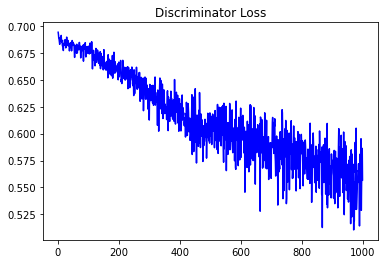

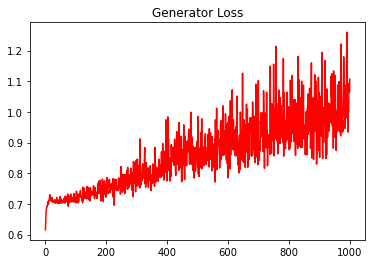

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5397480291966349


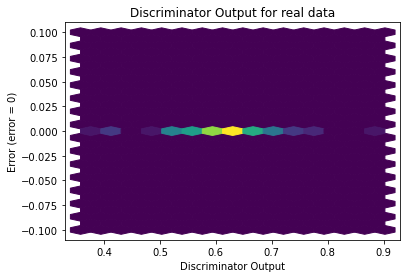

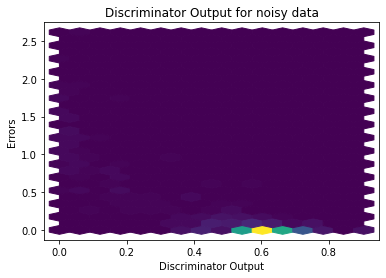

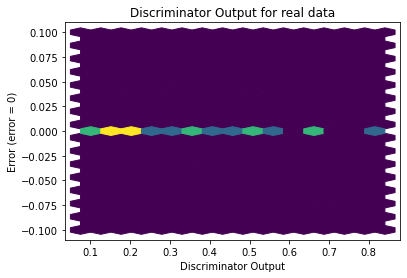

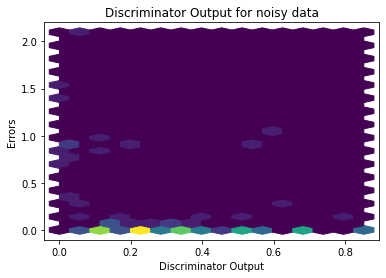

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


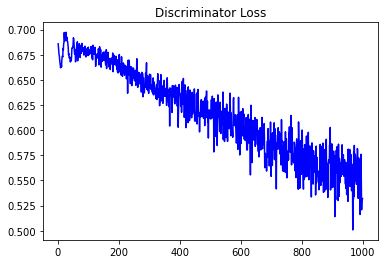

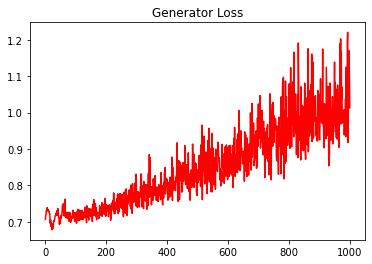

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.612251531113172


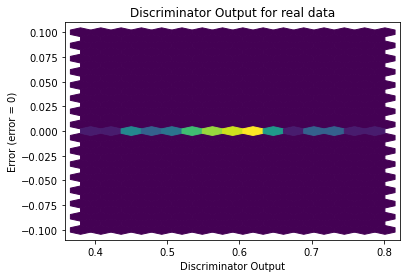

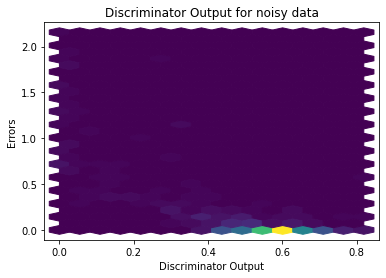

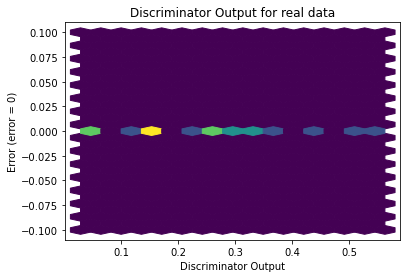

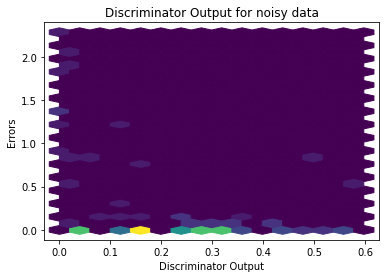

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9518]], requires_grad=True)
